In [1]:
import cv2
# loading the haarcascade classifier
model = cv2.CascadeClassifier("license-plate.xml")

# function for detecting and cropping the license plate
def plate_extractor(img):
    
    # converting RGB image to gray scale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # detecting the license plate
    plate = model.detectMultiScale(gray)
    
    if plate == ():
        return None
    
    # cropping the plate
    for (x,y,w,h) in plate:
        crop_plate = img[y:y+h, x:x+w]

    return crop_plate

    
# initializing the webcam    
cap = cv2.VideoCapture(0)
count = 0

#collecting the sample of license plate and storing it in a file
while True:
        

    ret, frame = cap.read()
    if plate_extractor(frame) is not None:
        count += 1
        plate = cv2.resize(plate_extractor(frame), (200, 200))
        plate = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
        file_name_path = "./plate/" +"1"+ '.jpg'
        cv2.imwrite(file_name_path, plate)
        cv2.imshow('plate Cropper', plate)
        
    else:
        print("plate not found")
        pass

    if cv2.waitKey(1) == 13 or count==1: 
        break
        
cap.release()
cv2.destroyAllWindows()      
    

<ipython-input-1-4be4193440d9>:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if plate == ():


In [2]:
# importing packages for ocr
import pytesseract
from PIL import Image
# giving the path for tesseract executable file for enabling ocr
pytesseract.pytesseract.tesseract_cmd=r"C:\Users\Akhila Vutukuri\AppData\Local\Programs\Tesseract-OCR\tesseract.exe"

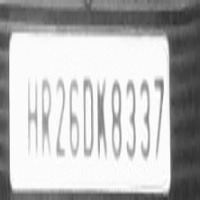

In [3]:
# opening and viewing the detected license-plate
image = Image.open("./plate/1.jpg")
image

In [4]:
# character recognition and extraction
text=pytesseract.image_to_string("./plate/1.jpg",lang='eng') #converts image characters to string
print(text)

HR26DK8337

